## Frequency Spectrum

As we learnt in the last section, any 1-D signal can be split into arbitrary number of sinusoidal waves. In this section, we shall see how to analyse these signals in terms of its frequency. 

Again, let's consider a simple sine wave having an amplitude 1, frequency 10 and zero initial phase. Run the following code to get the plot


Text(0, 0.5, 'Amplitude')

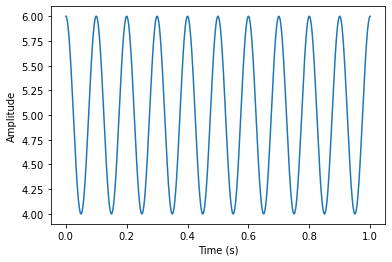

In [1]:
from misc import *

amp,freq,phase = 1,10,0
w1 = [(amp,freq,phase)]
signal1,time = addwaves(w1,const=5,tot_time=1,numpoints=1000)
plt.plot(time,signal1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

The signal is recorded for 1s and has 10 cycles through it, thus it has a frequency of 10 Hz. The average value of the signal is around 5, so this is the DC component of our signal. To find the "frequency spectra" of this we can use a "Discrete Fourier Transform", which is a mathematical operation given by

\begin{equation}
    F_k = \sum\limits_{m=0}^{P-1} b(k) \cdot e^{i \cdot \frac{-2 \pi k \cdot m}{P}}
\end{equation}

This gives the $complex$ fourier coefficient of the $k^{th}$ frequency. The magnitude and phase of the wave can be extracted directly from this complex coefficient. Run the following code to get the amplitudes at different frequencies. To increase or decrease the frequency range displayed in the x-axis, change the 'flimit' parameter. By default, it is set at 80. 

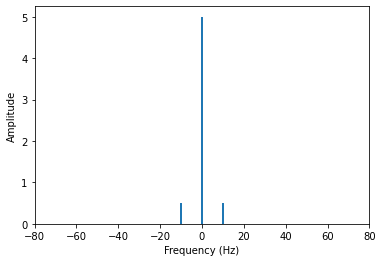

In [2]:
plot_fft_1d_signal(signal1,flimit=80)

We see that there is peak at 0 Hz, with a value of 5. This is the average value we get by integrating over the whole time period. Integral of a sine wave over full time period is zero, thus the amplitude of frequency spectra at 0 Hz is it's DC power. 

We also see that the plot has a symmetry around the 0 Hz line. The reason for this stems from the complex nature of the DFT signal. So the two peaks are the complex conjugates of one another - they have the same amplitude, but opposite phase. 

We see a peak at 10 Hz and -10 Hz with a value of 0.5. Together they have a value of 1. This means there is one full cycle of 10 Hz frequency present in our signal, which can be verified easily from above. 

Suppose we add a 20 Hz and 40 Hz signal to the original wave, this is what we get

In [ ]:
w2 = [(1,10,0),(1,20,0),(1,40,0)]
plot_1Dwave_and_fft(w2,flimit=100)

Now the signal looks complicated. We can't know which frequencies are present in the signal just by looking at it's time varying plot. The frequency spectrum on the other hand, clearly show distinct peaks at 10 Hz, 20 Hz and 40 Hz!  

An important point to consider while using the DFT is the relation between co-ordinate index of the frequency spectra and it's frequency. Each co-ordinate index in the frequency spectra corresponds to a specific frequency. The mapping between the index and frequency must be well understood. 

Suppose a signal has 'n' samples, with a sample spacing of 'd' units. Then, each index in the fourier transform corresponds to a shift in frequency of $\frac{1}{n \cdot d}$

The maximum frequency in the frequency spectra is $ \frac{(n-1)}{2 \cdot n \cdot d}$. Thus, there are $\frac{n-1}{2}$ samples in the positive and negative halves of the fourier spectra. 

Now try changing these amplitudes and frequencies yourself and observe how the frequency spectrum changes!

In [ ]:
play_with_three_sine_waves()

In the next section, we dive into 2D signals, or Images. We shall apply these concepts for such signals as well. 

[Prev: Fourier Series](ip_basics_part2.ipynb#section_id2)    
[Next: 2-D Fourier Analysis](ip_basics_part4.ipynb#section_id2)

## Assignment 
* Given a signal of length 1000 , and sampling freq of 50 Hz, what is the maximum freq in the freq spectra? Perhaps best to show as a graph? 
* Given a fourier spectrum with regular indices as x axis, find the frequency corresponding to the 3 peaks 

In one of the AFM experiments done within the group, a student got the following data. 

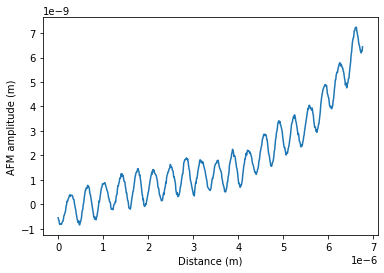

In [125]:
import csv
def get_sample_data():
    df1 = pd.read_csv('afm_data.csv',delimiter=';')
    data = df1.values
    x = data[:,0]
    signal = data[:,1]
    x = x - x.min()
    return x,signal
dist,afm_signal = get_sample_data()

plt.plot(dist,afm_signal);
plt.xlabel('Distance (m)');
plt.ylabel('AFM amplitude (m)');

The expected result was a smoothly varying line. Instead, we see a lot of high frequency noise in the data. You need to design a filter to remove this noise. 

In [126]:
n = len(afm_signal) # n=694, given
xmax = dist.max() # 6.75669e-6 m

694 data points were collected at equally spaced intervals, over a scan length of 6.757 $\mu$m. Uncomment the following code block, and fill in the expression in the code below to calculate the spatial sampling frequency. 

In [127]:
sampling_distance = xmax/n
sampling_frequency = 1/sampling_distance

Given a sampling frequency and the total number of points, it should be possible to find the frequency step for every coordinate shift in the fourier space. Fill in the expression in the code below to calculate the frequency step

In [128]:
f_step = 1 / (n*sampling_distance)
print(f_step)

148001.46225444708


The maximum frequency present in the fourier transform is it's Nyquist Frequency. Calculate that here:

In [129]:
nyquist_frequency = sampling_frequency / 2

Now, we need to define the x-axis of the Fourier Spectrum. It is related to the index positions. Write the following code to relate the index position to the frequency

In [130]:
x_axis_left_half = np.ogrid[-nyquist_frequency:0:f_step]
x_axis_right_half = np.ogrid[0:nyquist_frequency:f_step]
x_axis = np.concatenate((x_axis_left_half,x_axis_right_half))

(-10000000.0, 10000000.0)

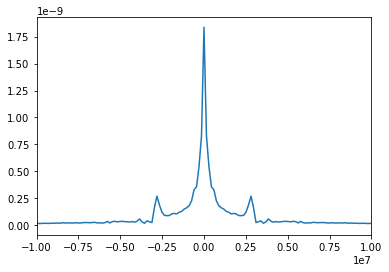

In [131]:
ft = abs(fft(afm_signal))/n
plt.plot(x_axis,ft)
plt.xlim([-1e7,1e7])


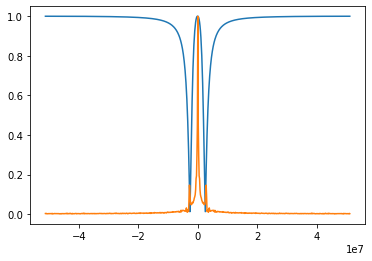

In [181]:
from scipy import signal
f_noise = 0.25e7
b,a = signal.iirnotch(f_noise,1,sampling_frequency)
freq, h = signal.freqz(b, a, fs=sampling_frequency,worN=n//2)
notch = np.concatenate((h[::-1],h))
plt.plot(x_axis,abs(notch),x_axis,abs(ft)/ft.max());

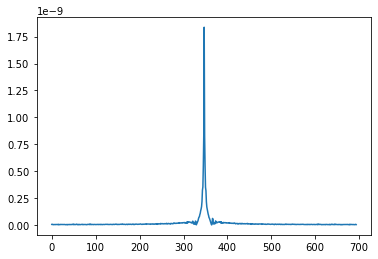

In [182]:
filtered = fft(afm_signal) * notch
plt.plot(abs(filtered)/n);


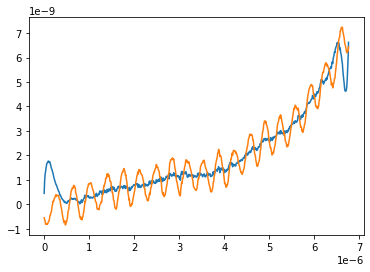

In [183]:
filtered_signal = np.fft.ifft(np.fft.ifftshift((filtered)))
plt.plot(dist,abs(filtered_signal),dist,afm_signal);